In [35]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib.style as stl
import seaborn as sns
%matplotlib inline
import random
import warnings
warnings.filterwarnings('ignore')

In [76]:
import statsmodels
import scipy

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)




In [54]:
from google.colab import files
uploaded = files.upload()

Saving coin_CryptocomCoin.csv to coin_CryptocomCoin (3).csv


In [55]:
data = pd.read_csv('coin_CryptocomCoin.csv')

In [56]:
data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Crypto.com Coin,CRO,2018-12-15 23:59:59,0.019845,0.016150,0.019542,0.017243,9.897096e+05,0.000000e+00
1,2,Crypto.com Coin,CRO,2018-12-16 23:59:59,0.017496,0.014127,0.017213,0.015301,7.171740e+05,0.000000e+00
2,3,Crypto.com Coin,CRO,2018-12-17 23:59:59,0.016723,0.011487,0.015186,0.014448,6.156226e+05,1.547062e+07
3,4,Crypto.com Coin,CRO,2018-12-18 23:59:59,0.017215,0.013553,0.014308,0.016260,7.644745e+05,1.785590e+07
4,5,Crypto.com Coin,CRO,2018-12-19 23:59:59,0.031509,0.015609,0.016087,0.020790,1.025196e+06,2.340088e+07


In [57]:
data.shape

(935, 10)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SNo           935 non-null    int64  
 1   Name          935 non-null    object 
 2   Symbol        935 non-null    object 
 3   High          935 non-null    float64
 4   Low           935 non-null    float64
 5   Open          935 non-null    float64
 6   Close         935 non-null    float64
 7   Volume        935 non-null    float64
 8   Marketcap     935 non-null    float64
 9   Date_year     935 non-null    int64  
 10  Date_month    935 non-null    int64  
 11  Date_day      935 non-null    int64  
 12  Date_hour     935 non-null    int64  
 13  Date_minute   935 non-null    int64  
 14  Date_seconde  935 non-null    int64  
dtypes: float64(6), int64(7), object(2)
memory usage: 109.7+ KB


In [68]:
data.isna().sum()

SNo             0
Name            0
Symbol          0
High            0
Low             0
Open            0
Close           0
Volume          0
Marketcap       0
Date_year       0
Date_month      0
Date_day        0
Date_hour       0
Date_minute     0
Date_seconde    0
dtype: int64

In [58]:
import datetime as dt
data["Date"]=pd.to_datetime(data["Date"])
data['Date_year'] =data["Date"].dt.year
data['Date_month'] =data["Date"].dt.month
data['Date_day'] =data["Date"].dt.day
data['Date_hour'] =data["Date"].dt.hour
data['Date_minute'] =data["Date"].dt.minute
data['Date_seconde'] =data["Date"].dt.second
data.drop(["Date"], axis=1, inplace=True)

In [69]:
data.head()

,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap,Date_year,Date_month,Date_day,Date_hour,Date_minute,Date_seconde
0,1,Crypto.com Coin,CRO,0.019845,0.016150,0.019542,0.017243,9.897096e+05,0.000000e+00,2018,12,15,23,59,59
1,2,Crypto.com Coin,CRO,0.017496,0.014127,0.017213,0.015301,7.171740e+05,0.000000e+00,2018,12,16,23,59,59
2,3,Crypto.com Coin,CRO,0.016723,0.011487,0.015186,0.014448,6.156226e+05,1.547062e+07,2018,12,17,23,59,59
3,4,Crypto.com Coin,CRO,0.017215,0.013553,0.014308,0.016260,7.644745e+05,1.785590e+07,2018,12,18,23,59,59
4,5,Crypto.com Coin,CRO,0.031509,0.015609,0.016087,0.020790,1.025196e+06,2.340088e+07,2018,12,19,23,59,59


In [70]:
numeric=['High', 'Low', 'Open','Close','Volume', 'Marketcap', 'Date_year','Date_month','Date_day', 'Date_minute','Date_seconde']
category=['Name','Symbol']

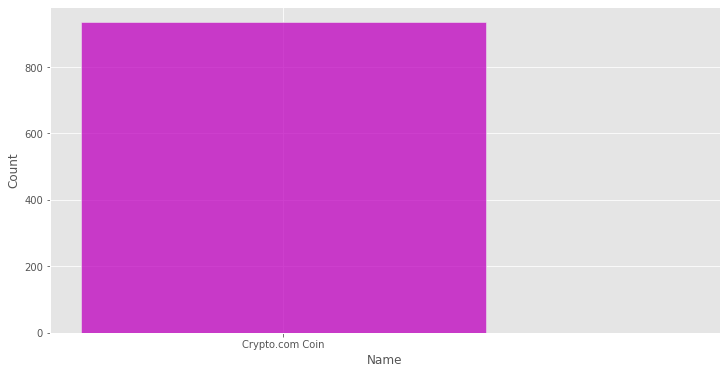

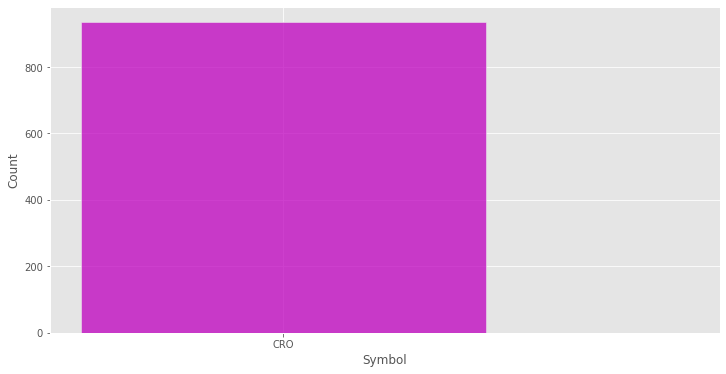

In [71]:
stl.use('ggplot')

for col in category:
    plt.figure(figsize=(12,6))
    sns.histplot(data[col], color="m")
    plt.show

In [78]:
pip install category_encoders

     |████████████████████████████████| 86 kB 4.6 MB/s 


In [79]:
import category_encoders as ce
ordenc=ce.OrdinalEncoder(cols=['Name','Symbol'])
encdata=ordenc.fit_transform(data)

In [80]:
encdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SNo           935 non-null    int64  
 1   Name          935 non-null    int64  
 2   Symbol        935 non-null    int64  
 3   High          935 non-null    float64
 4   Low           935 non-null    float64
 5   Open          935 non-null    float64
 6   Close         935 non-null    float64
 7   Volume        935 non-null    float64
 8   Marketcap     935 non-null    float64
 9   Date_year     935 non-null    int64  
 10  Date_month    935 non-null    int64  
 11  Date_day      935 non-null    int64  
 12  Date_hour     935 non-null    int64  
 13  Date_minute   935 non-null    int64  
 14  Date_seconde  935 non-null    int64  
dtypes: float64(6), int64(9)
memory usage: 109.7 KB


In [81]:
data.duplicated().sum()

0

In [82]:
def outlier(col):
    color = random.choice(['r', 'g', 'b'])
    fig, ax = plt.subplots(1,2,figsize=(18,5))
    sns.distplot(col, ax=ax[0], color=color)
    sns.boxplot(col, ax=ax[1], color=color)
    plt.suptitle('Distribution & Boxplot for Outlier Detection')
    fig.show()
    return None

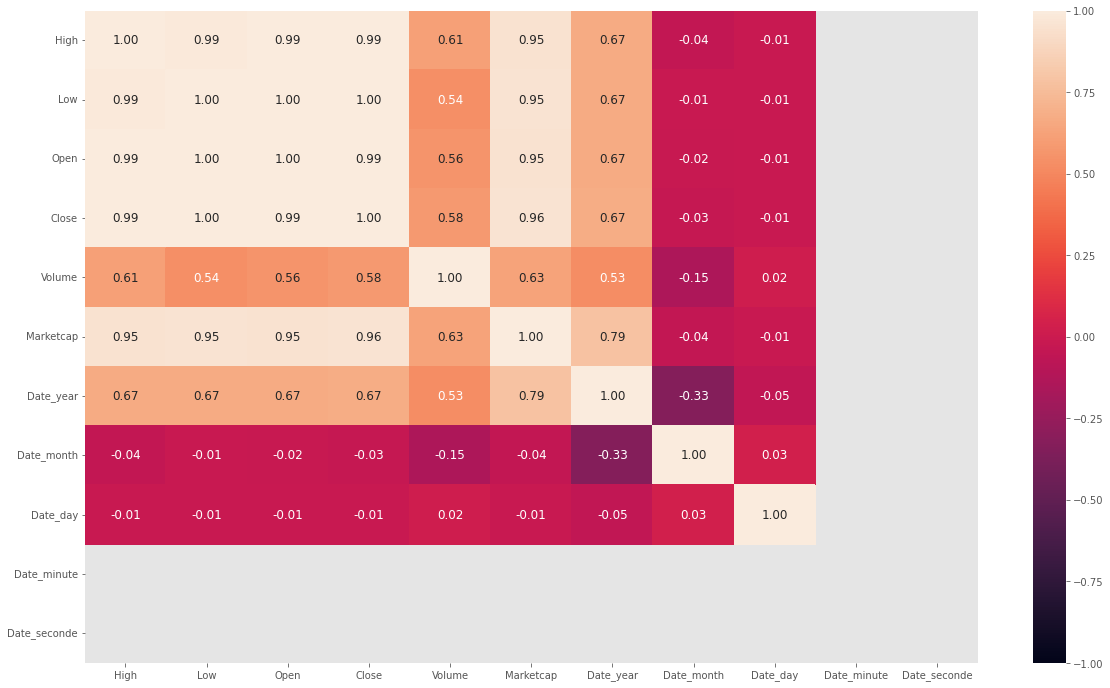

In [83]:
plt.figure(figsize=(20,12))
sns.heatmap(data[numeric].corr(), annot=True, annot_kws={"fontsize":12}, fmt=".2f", vmin=-1)
plt.show()

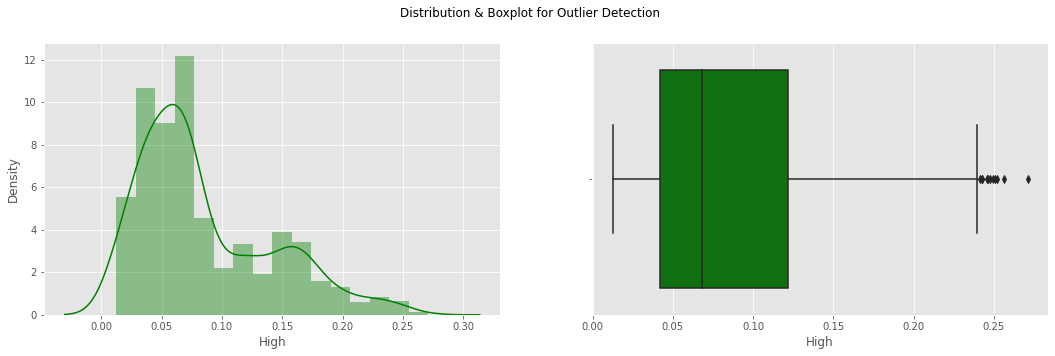

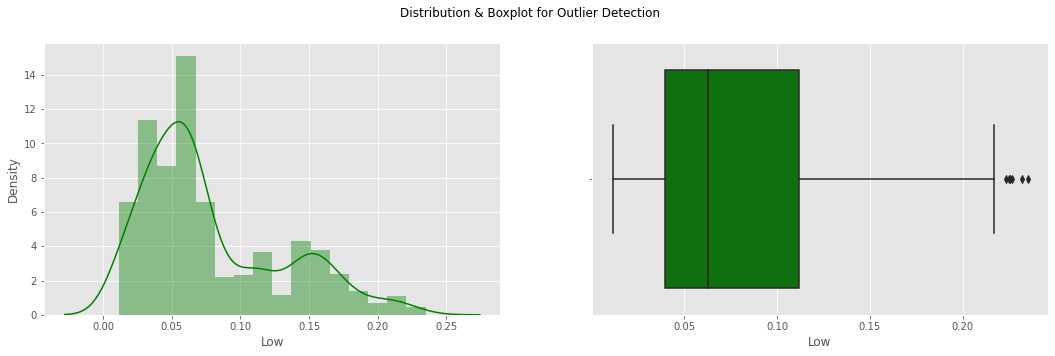

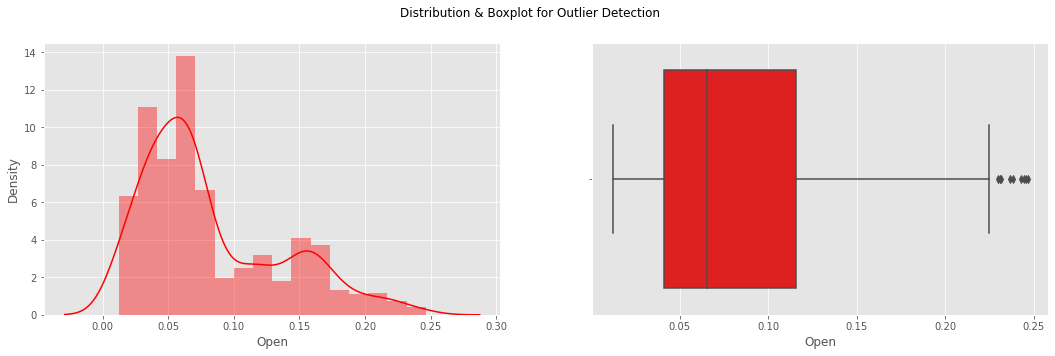

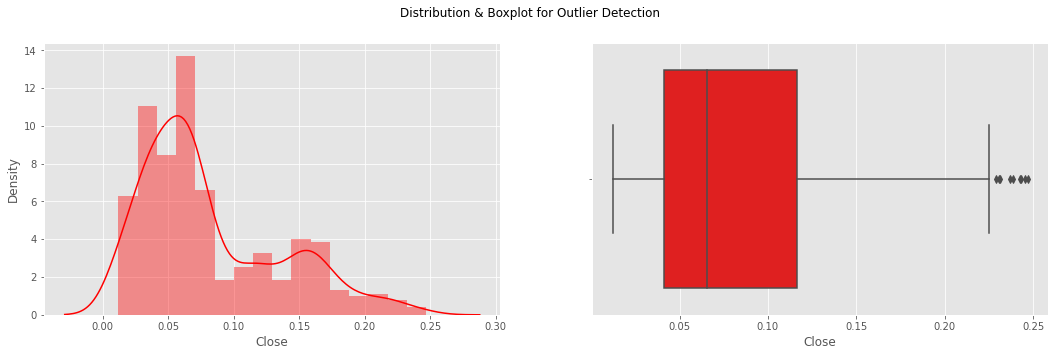

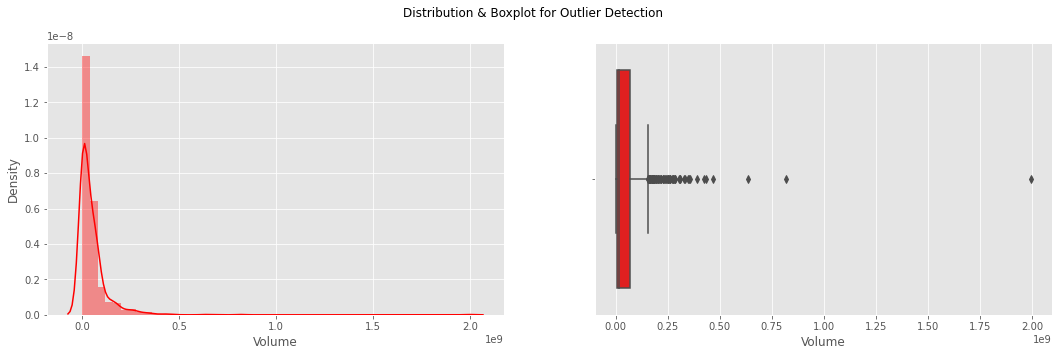

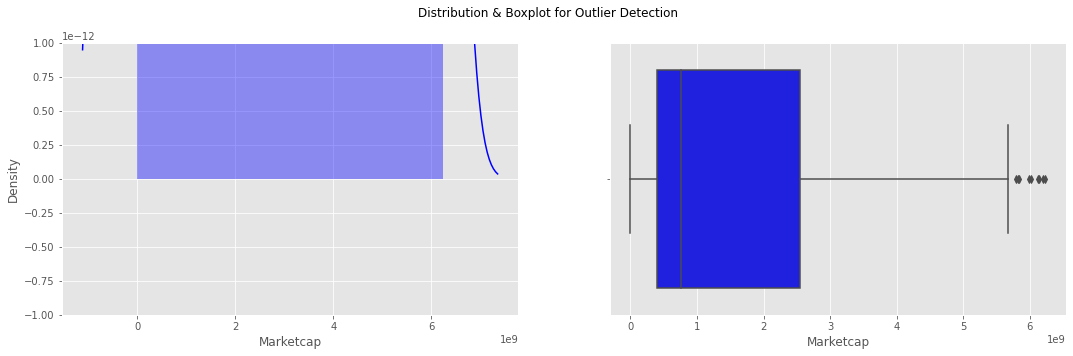

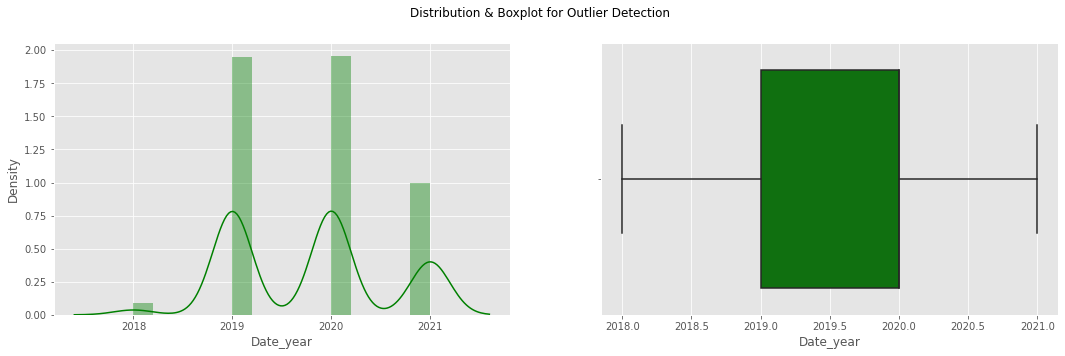

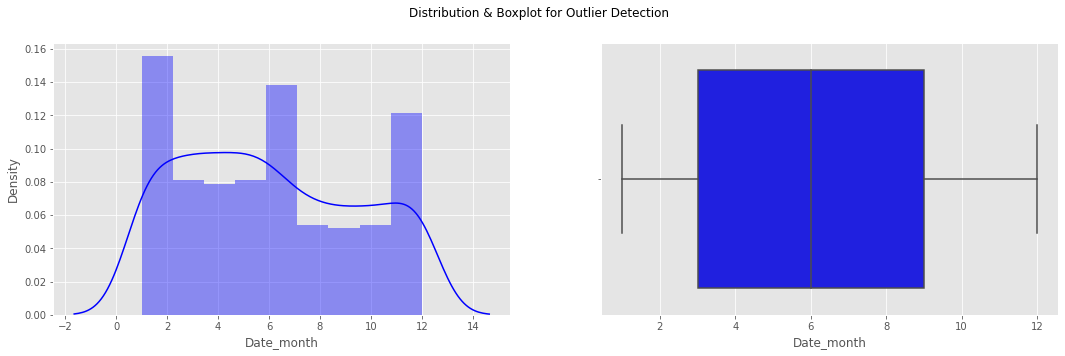

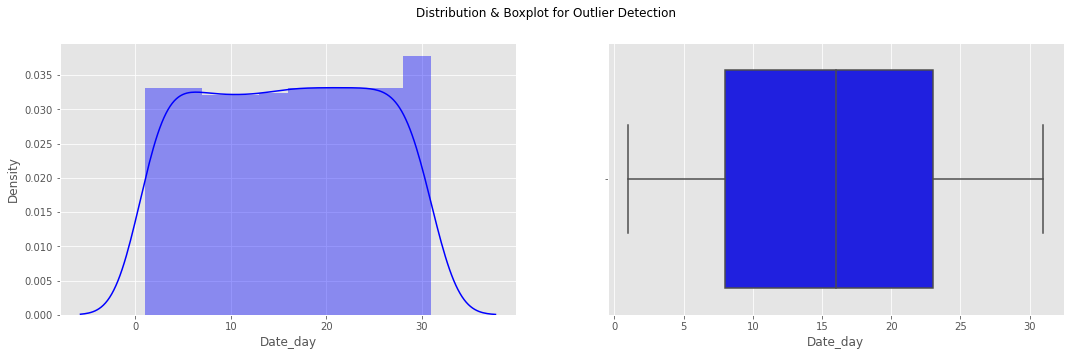

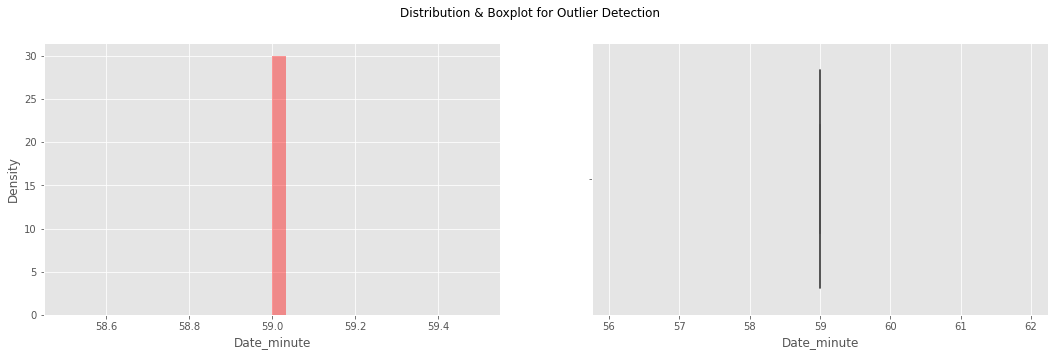

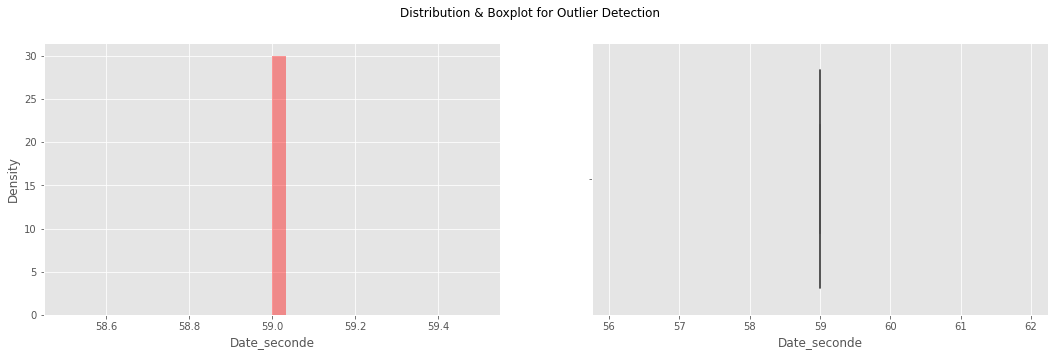

In [66]:
for i in numeric:
    outlier(data[i])
    

In [84]:
encdata.head()

,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap,Date_year,Date_month,Date_day,Date_hour,Date_minute,Date_seconde
0,1,1,1,0.019845,0.016150,0.019542,0.017243,9.897096e+05,0.000000e+00,2018,12,15,23,59,59
1,2,1,1,0.017496,0.014127,0.017213,0.015301,7.171740e+05,0.000000e+00,2018,12,16,23,59,59
2,3,1,1,0.016723,0.011487,0.015186,0.014448,6.156226e+05,1.547062e+07,2018,12,17,23,59,59
3,4,1,1,0.017215,0.013553,0.014308,0.016260,7.644745e+05,1.785590e+07,2018,12,18,23,59,59
4,5,1,1,0.031509,0.015609,0.016087,0.020790,1.025196e+06,2.340088e+07,2018,12,19,23,59,59


In [85]:
x= encdata.drop("Marketcap", axis=1)
y=encdata["Marketcap"]
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=23)
from sklearn.metrics import explained_variance_score, r2_score
from sklearn.metrics import mean_absolute_error


In [86]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=1)
tree.fit(xtrain, ytrain)
ypredtest = tree.predict(xtest)

In [87]:
mean_absolute_error(ytest, ypredtest)

41503309.87005309

In [88]:
from sklearn.model_selection import GridSearchCV
hyperparameters = {"max_depth":(5, 8, 15, 30, 35, 50), "max_features":(0.2, 0.4, 0.6, 0.8), "min_samples_split":(2, 5, 8, 10, 20)}
Grid= GridSearchCV(estimator=tree, param_grid=hyperparameters, cv=8, scoring="neg_mean_absolute_error", n_jobs=-1)
Grid.fit(xtrain, ytrain)



GridSearchCV(cv=8, estimator=DecisionTreeRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': (5, 8, 15, 30, 35, 50),
                         'max_features': (0.2, 0.4, 0.6, 0.8),
                         'min_samples_split': (2, 5, 8, 10, 20)},
             scoring='neg_mean_absolute_error')

In [89]:
Grid.best_estimator_


DecisionTreeRegressor(max_depth=15, max_features=0.8, random_state=1)

In [90]:
Grid.best_params_

{'max_depth': 15, 'max_features': 0.8, 'min_samples_split': 2}

In [91]:
tree = DecisionTreeRegressor(max_depth=15,max_features=0.8, min_samples_split= 2, random_state=1)
tree.fit(xtrain, ytrain)
ypredd = tree.predict(xtest)

In [92]:
mean_absolute_error(ytest, ypredd)

35094018.82906895

In [93]:
pd.DataFrame(Grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005898,0.002798,0.002586,0.000263,5,0.2,2,"{'max_depth': 5, 'max_features': 0.2, 'min_sam...",-2.667253e+08,-3.280637e+08,-1.722057e+08,-1.176568e+08,-1.564901e+08,-2.054917e+08,-1.462198e+08,-2.358728e+08,-2.035907e+08,6.557893e+07,119
1,0.007641,0.004903,0.006009,0.007167,5,0.2,5,"{'max_depth': 5, 'max_features': 0.2, 'min_sam...",-2.667253e+08,-3.280637e+08,-1.727980e+08,-1.497997e+08,-1.564901e+08,-1.328520e+08,-1.729320e+08,-2.387136e+08,-2.022968e+08,6.393724e+07,118
2,0.004757,0.001174,0.008996,0.003927,5,0.2,8,"{'max_depth': 5, 'max_features': 0.2, 'min_sam...",-2.667253e+08,-3.280637e+08,-1.727980e+08,-1.334611e+08,-1.486914e+08,-1.602992e+08,-1.459899e+08,-2.387136e+08,-1.993428e+08,6.580374e+07,116
3,0.006314,0.002972,0.005779,0.003238,5,0.2,10,"{'max_depth': 5, 'max_features': 0.2, 'min_sam...",-2.679610e+08,-3.280637e+08,-1.727980e+08,-1.334611e+08,-1.486914e+08,-1.602992e+08,-1.459899e+08,-2.387136e+08,-1.994972e+08,6.596298e+07,117
4,0.007897,0.004658,0.006335,0.003161,5,0.2,20,"{'max_depth': 5, 'max_features': 0.2, 'min_sam...",-1.734474e+08,-3.288234e+08,-2.667412e+08,-1.320071e+08,-2.488562e+08,-2.272722e+08,-2.305958e+08,-2.638402e+08,-2.339479e+08,5.623677e+07,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.024857,0.016290,0.004797,0.003596,50,0.8,2,"{'max_depth': 50, 'max_features': 0.8, 'min_sa...",-7.067480e+07,-9.095765e+07,-4.329828e+07,-3.969139e+07,-3.862122e+07,-5.190009e+07,-4.363660e+07,-4.588514e+07,-5.308315e+07,1.721417e+07,21
116,0.015331,0.007379,0.002654,0.000193,50,0.8,5,"{'max_depth': 50, 'max_features': 0.8, 'min_sa...",-6.259777e+07,-6.904922e+07,-3.632965e+07,-3.540306e+07,-4.229563e+07,-5.495266e+07,-3.565963e+07,-4.849374e+07,-4.809767e+07,1.216746e+07,2
117,0.025281,0.007522,0.008894,0.005189,50,0.8,8,"{'max_depth': 50, 'max_features': 0.8, 'min_sa...",-7.472561e+07,-7.983299e+07,-4.065153e+07,-3.287829e+07,-4.730681e+07,-5.053202e+07,-3.683273e+07,-4.020945e+07,-5.037118e+07,1.642245e+07,8
118,0.008812,0.004696,0.002634,0.000377,50,0.8,10,"{'max_depth': 50, 'max_features': 0.8, 'min_sa...",-7.619497e+07,-8.401742e+07,-4.877459e+07,-3.454150e+07,-3.709543e+07,-4.871721e+07,-4.859364e+07,-4.410197e+07,-5.275459e+07,1.668856e+07,14


In [94]:
from sklearn.model_selection import cross_val_score
cvscore = cross_val_score(tree, xtrain, ytrain, cv=8)
cvscore

array([0.9698909 , 0.95948138, 0.99784682, 0.99861026, 0.99633293,
       0.99710059, 0.99826011, 0.99803353])

In [95]:
cvscore.mean()


0.989444564679633

In [96]:
  from sklearn.model_selection import ShuffleSplit
cv=ShuffleSplit(6,test_size=0.3)
cvs=cross_val_score(tree,x,y, cv=cv)

In [97]:
cvs.mean()

0.9919145727748582

In [98]:
from sklearn.ensemble import VotingClassifier

In [99]:
from sklearn import svm
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor

In [100]:
model1=SGDRegressor(random_state=0)
model2=KNeighborsRegressor(n_neighbors=5)
model3=DecisionTreeRegressor()
model4= VotingRegressor([('SGD',model1),
                         ('KNN',model2),('tree',DecisionTreeRegressor())
                         ])
for model in (model1,model2,model3, model4):
    model.fit(xtrain,ytrain)
    print(model.__class__.__name__, model.score(xtest,ytest))
    

SGDRegressor -2.934518273030342e+31
KNeighborsRegressor 0.6602504207221483
DecisionTreeRegressor 0.9922844267949193
VotingRegressor -3.2605758589226024e+30


In [101]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
model =BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100)
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.9976235143589925

In [ ]:
# the best score 